In [1]:
RESULTS_FOLDER = "../../results/pix2code/pix2code_lstm"

In [4]:
# %run ../../utils/extract_screenshots --folder ../../results/pix2code/pix2code_lstm

In [10]:
import os
import json

In [12]:
for filename in [file for file in os.listdir(RESULTS_FOLDER) if file.endswith('_pred.gui')]:
    dict_tmp = {}
    with open(RESULTS_FOLDER + "/" + filename.split("_pred")[0] + ".json", "w") as f:
        json.dump(dict_tmp, f, indent=2)

In [13]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/pix2code/pix2code_lstm --pix2codeOriginal

In [14]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [15]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [16]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,similarity_index
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,327.948276,322.040230,335.112069,0.877756,44.925287,0.132139,0.934853
std,74.017427,78.785951,76.316168,0.091309,33.041327,0.086584,0.025421
min,81.000000,78.000000,81.000000,0.420771,0.000000,0.000000,0.873336
25%,342.000000,326.000000,343.000000,0.869951,25.000000,0.074967,0.913381
50%,356.000000,347.000000,356.000000,0.903749,36.000000,0.105409,0.937479
75%,369.000000,364.000000,370.000000,0.924622,54.000000,0.158925,0.951577
max,395.000000,579.000000,579.000000,1.000000,236.000000,0.567568,0.992290


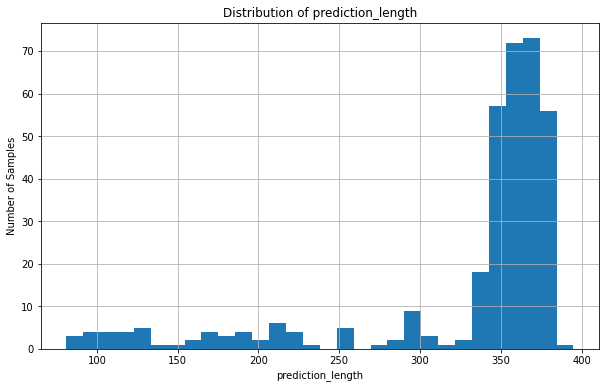

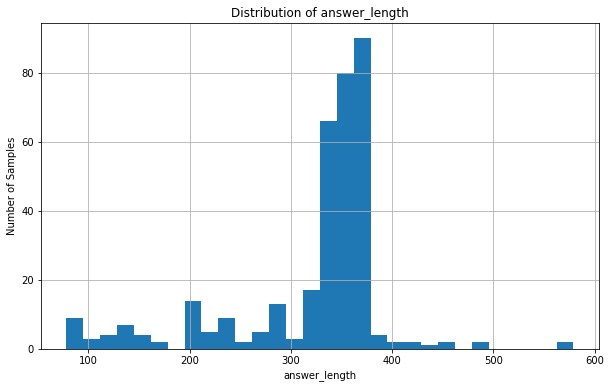

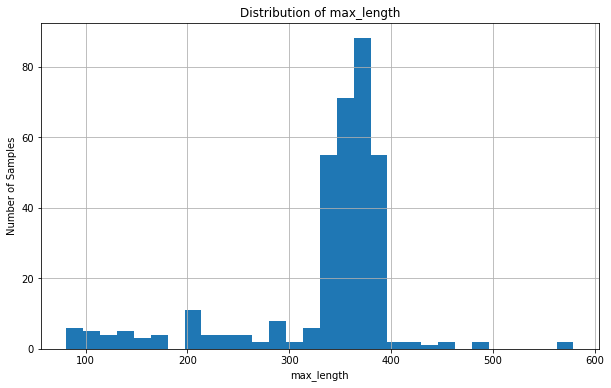

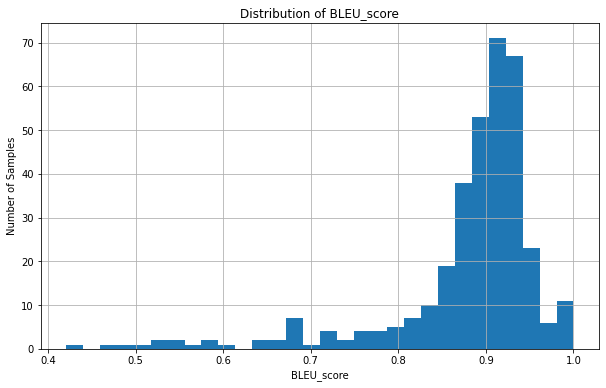

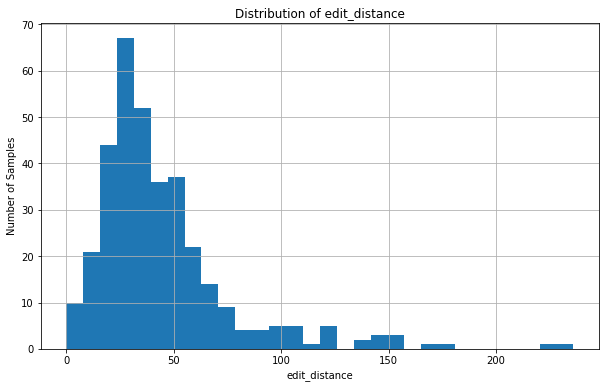

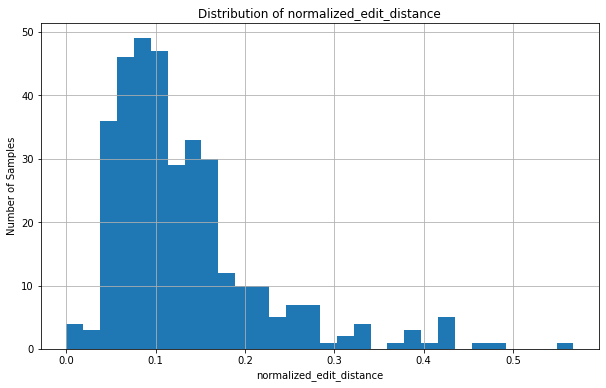

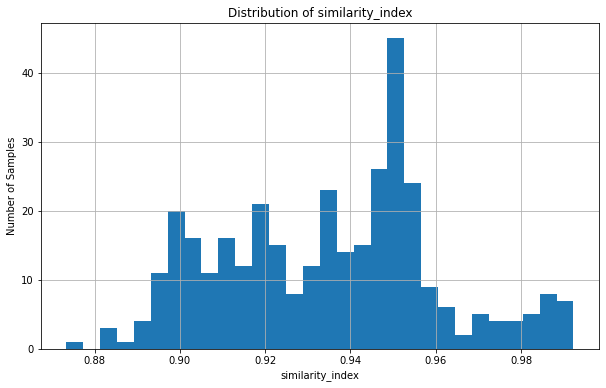

In [17]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "edit_distance", "normalized_edit_distance", "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


In [18]:
!pip3 install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


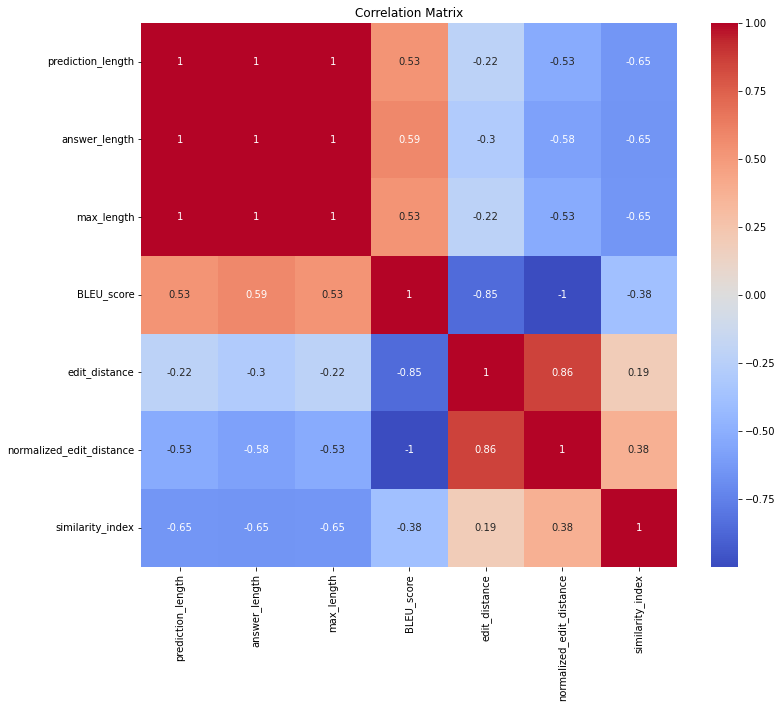

In [15]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

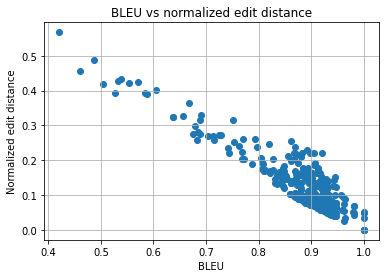

In [19]:
plt.scatter(df["BLEU_score"], df["normalized_edit_distance"])
plt.title("BLEU vs normalized edit distance")
plt.xlabel("BLEU")
plt.ylabel("Normalized edit distance")
plt.grid(True)
plt.show()


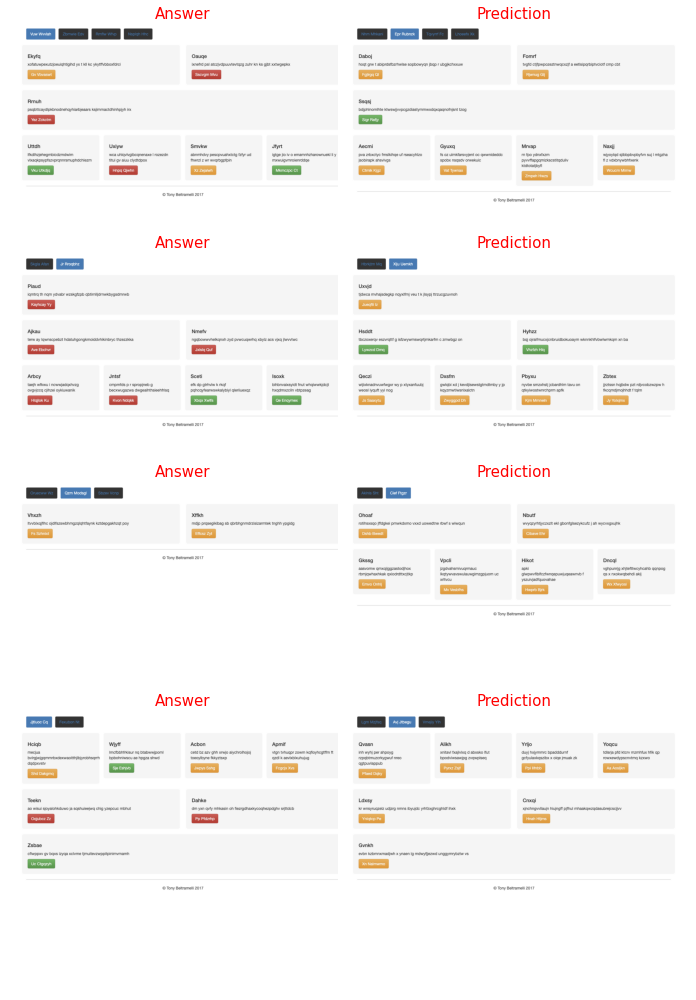

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 4

fig, axes = plt.subplots(NUMBER_DISPLAYED, 2, figsize=(10, NUMBER_DISPLAYED*3.5))

for idx, json_file_path in enumerate(all_json_files[4:4+NUMBER_DISPLAYED]):
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred.png"))
        
        axes[idx, 0].imshow(answer_img)
        axes[idx, 0].set_title('Answer', fontsize=15, color="red")
        axes[idx, 0].axis('off')

        axes[idx, 1].imshow(prediction_img)
        axes[idx, 1].set_title('Prediction', fontsize=15, color="red")
        axes[idx, 1].axis('off')

plt.tight_layout(h_pad=-7)

plt.show()
